<a href="https://colab.research.google.com/github/ByungjunKim/FoucaultKoreanLiterature/blob/main/%5BColab%5D%ED%91%B8%EC%BD%94%EC%9D%B8%EC%9A%A9%EB%85%BC%EB%AC%B8_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 푸코 인용 논문 분석

In [1]:
import pandas as pd
import ast
# matplotlib 폰트설정
import matplotlib.pyplot as plt
# https://github.com/killiansheriff/LovelyPlots
# plt.style.use(['ipynb','use_mathtext','colors5-light'])
# plt.rc('font', family='Malgun Gothic')
# print(plt.rcParams['font.family'])
plt.rcParams["figure.dpi"] = 240 # DPI 고화질로 향상

from scipy.stats import chi2_contingency
from scipy.stats import fisher_exact
from itertools import combinations
from statsmodels.sandbox.stats.multicomp import MultiComparison
from statsmodels.stats.multitest import multipletests
import scipy.stats

In [2]:
# github clone
!git clone https://github.com/ByungjunKim/FoucaultKoreanLiterature.git
!mkdir stats

Cloning into 'FoucaultKoreanLiterature'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 68 (delta 10), reused 0 (delta 0), pack-reused 50
Receiving objects: 100% (68/68), 121.12 MiB | 14.33 MiB/s, done.
Resolving deltas: 100% (18/18), done.
Updating files: 100% (26/26), done.


<Figure size 2400x2400 with 0 Axes>

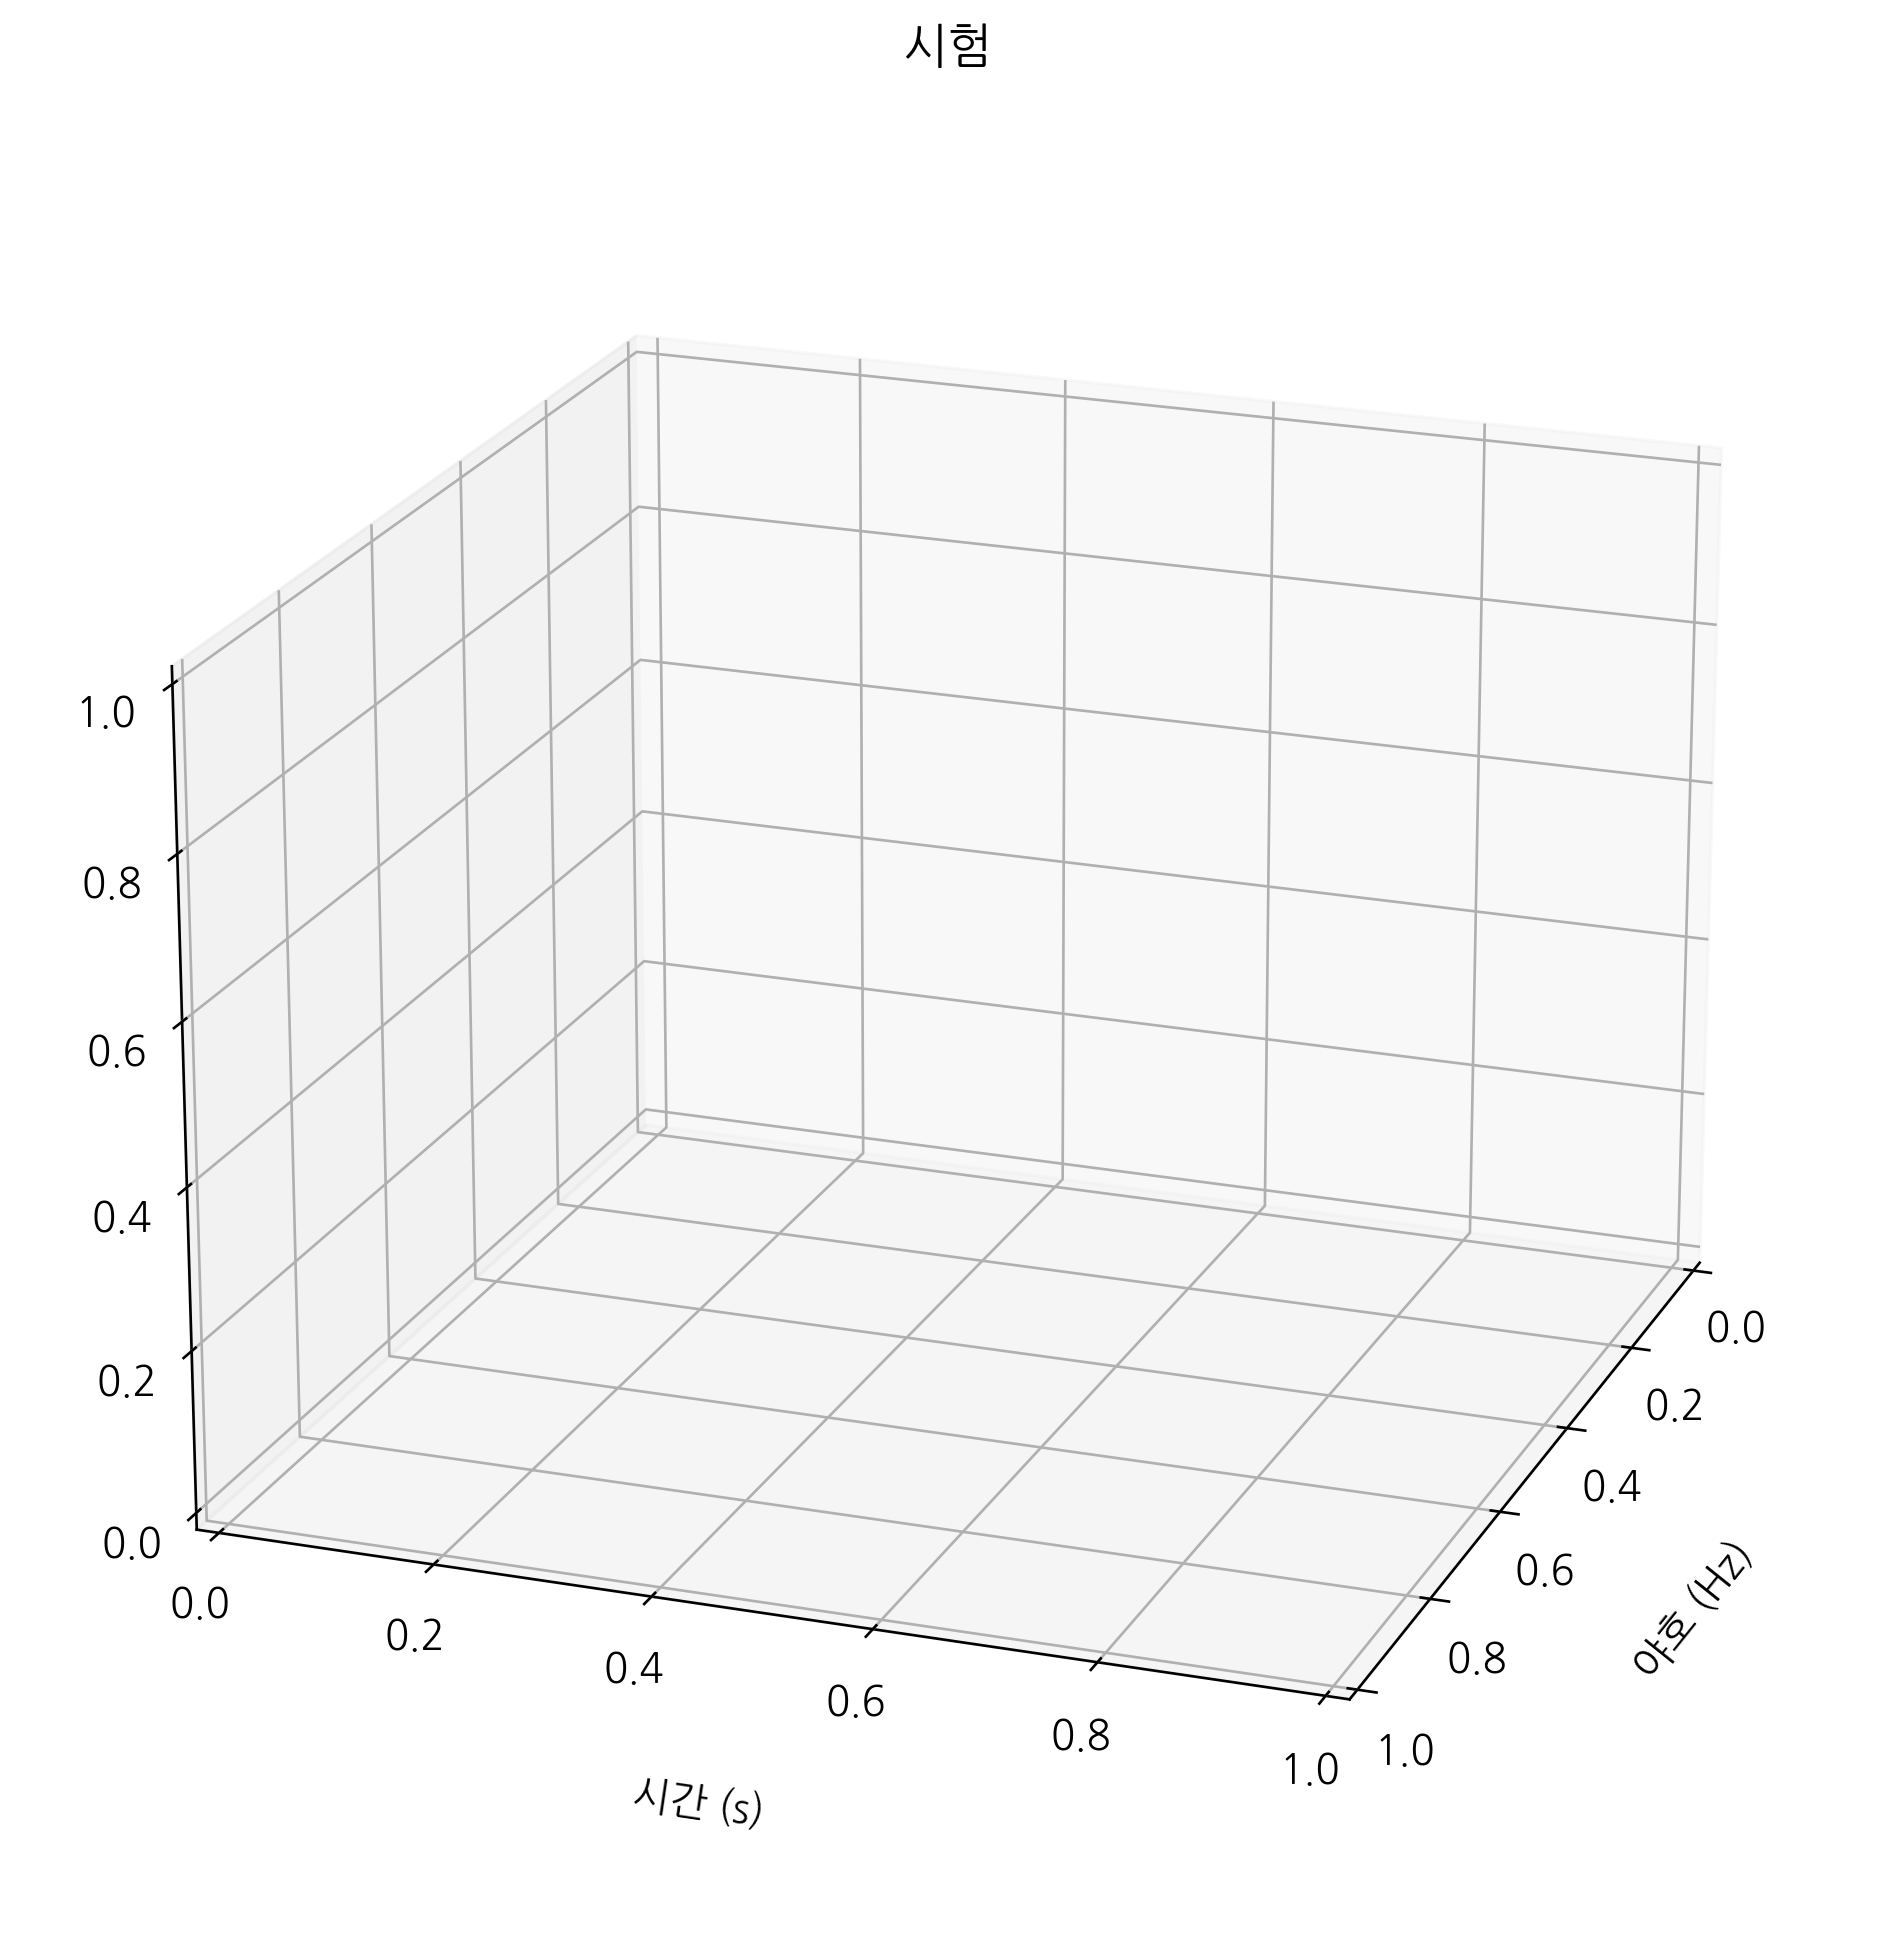

In [20]:
# 시각화 필요 라이브러리 불러오기
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 12, 'font.family': 'NanumGothic'}) # 폰트 설정

# 테스트 해보기
fig = plt.figure(figsize=(10, 10))
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(10, 10))

graph_title = '시험'
ax.set_title(f'{graph_title}')
ax.set_xlabel('야호 (Hz)', labelpad=20)
ax.set_ylabel('시간 (s)', labelpad=20)
ax.set_zlabel('이건 뭐지 (dB/Hz)', labelpad=20)

ax.view_init(20, 20)
plt.show()

### 1. 어떤 푸코의 저작이 인용되었나?

In [18]:
df = pd.read_pickle('./FoucaultKoreanLiterature/231005_2008_2021_df.pkl') # 한국현대문학 논문 서지정보
ref_df = pd.read_pickle('./FoucaultKoreanLiterature/231005_2008_2021_ref_df.pkl') # 한국현대문학 논문 참고문헌
ref_fu = pd.read_pickle('./FoucaultKoreanLiterature/231005_2008_2021_ref_fu.pkl') # 푸코 인용 논문 참고문헌

<Axes: >

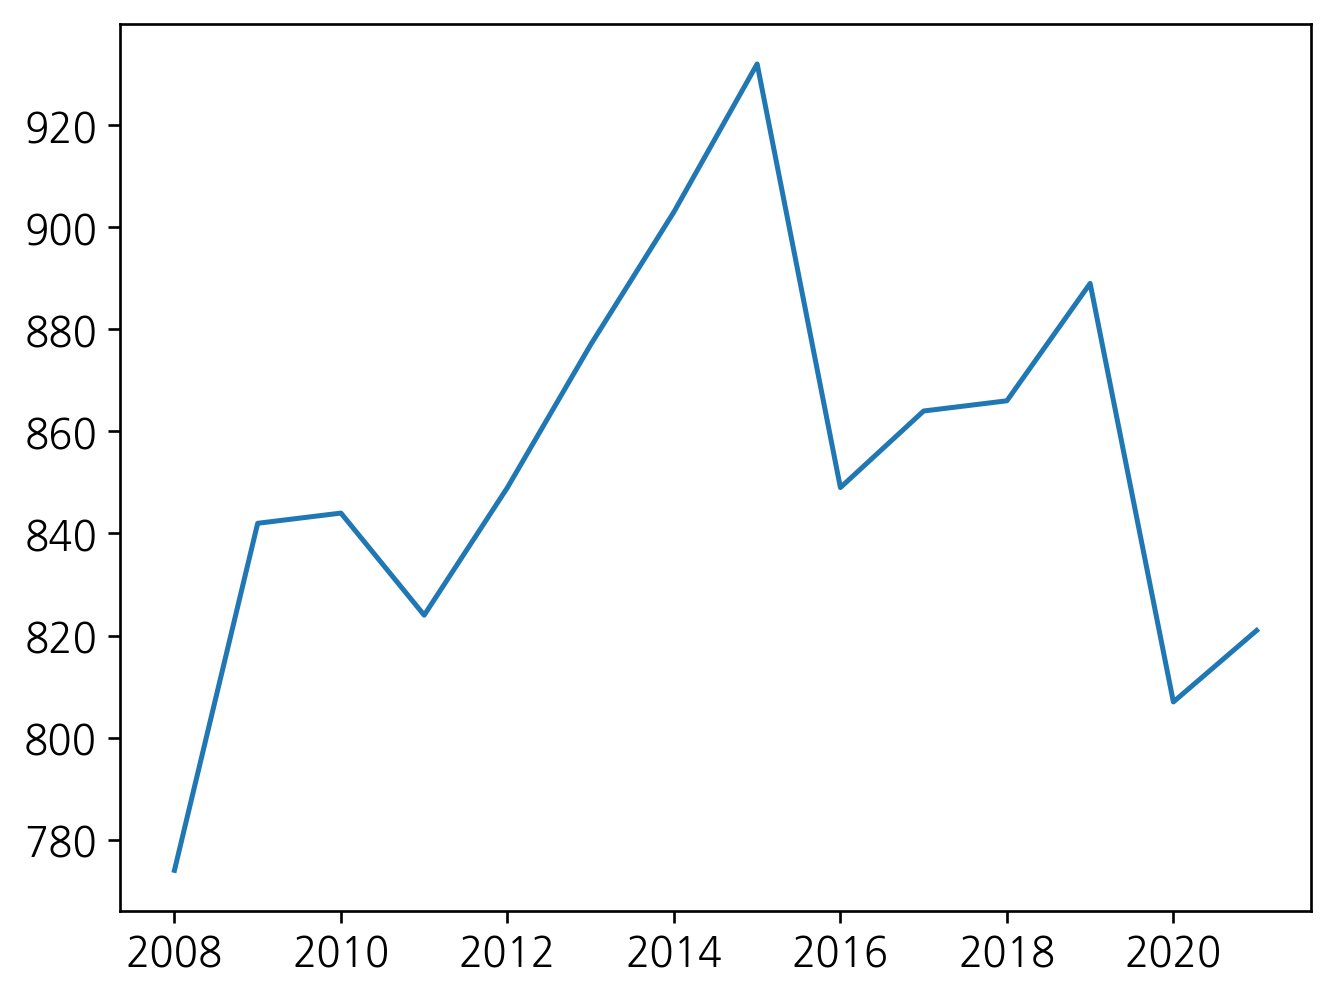

In [21]:
# 전체 분석 대상 논문 게재 추이
df['year'].value_counts().sort_index().plot()

2008    40
2009    42
2010    54
2011    41
2012    51
2013    51
2014    65
2015    74
2016    62
2017    65
2018    61
2019    81
2020    56
2021    83
Name: year, dtype: int64


<Axes: >

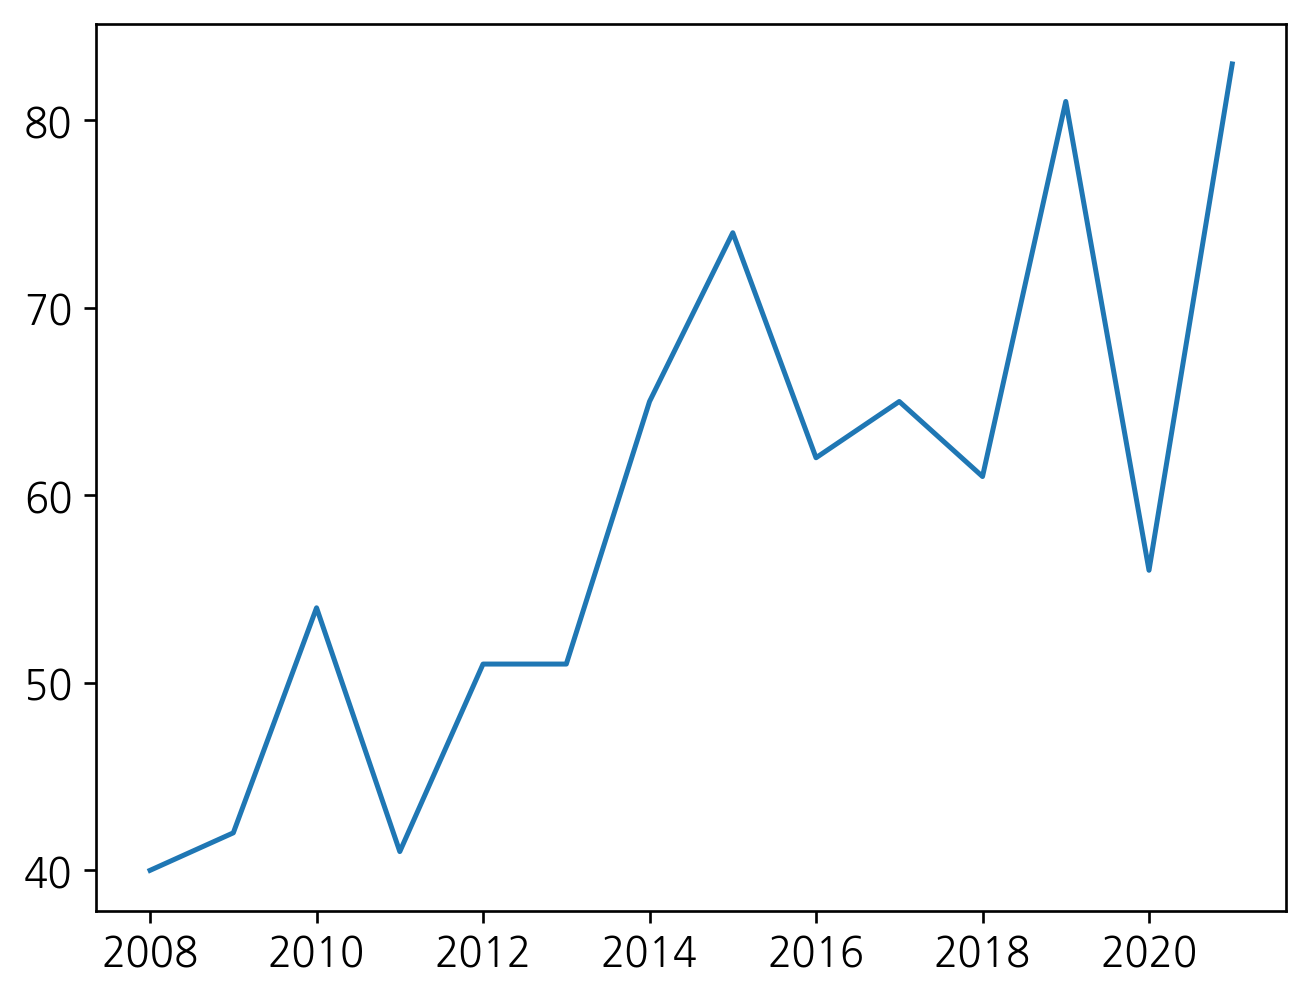

In [22]:
# 푸코 인용 추이
print(ref_fu['year'].value_counts().sort_index())
ref_fu['year'].value_counts().sort_index().plot()

In [23]:
ref_fu['classification'].value_counts(normalize=True)

2.0    0.498789
1.0    0.359564
3.0    0.100484
4.0    0.041162
Name: classification, dtype: float64

In [24]:
# pd.DataFrame(ref_fu['uri'].value_counts()).reset_index().to_excel('./stats/푸코저작_인용.xlsx')

In [25]:
pd.crosstab(ref_fu['classification'],ref_fu['year'],normalize='columns')

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
classification,,,,,,,,,,,,,,
1.0,0.425,0.357143,0.166667,0.365854,0.254902,0.333333,0.230769,0.432432,0.306452,0.276923,0.459016,0.419753,0.535714,0.421687
2.0,0.475,0.452381,0.648148,0.463415,0.568627,0.470588,0.661538,0.418919,0.580645,0.538462,0.459016,0.456790,0.321429,0.469880
3.0,0.075,0.142857,0.111111,0.097561,0.137255,0.137255,0.061538,0.054054,0.112903,0.107692,0.081967,0.098765,0.107143,0.108434
4.0,0.025,0.047619,0.074074,0.073171,0.039216,0.058824,0.046154,0.094595,0.000000,0.076923,0.000000,0.024691,0.035714,0.000000


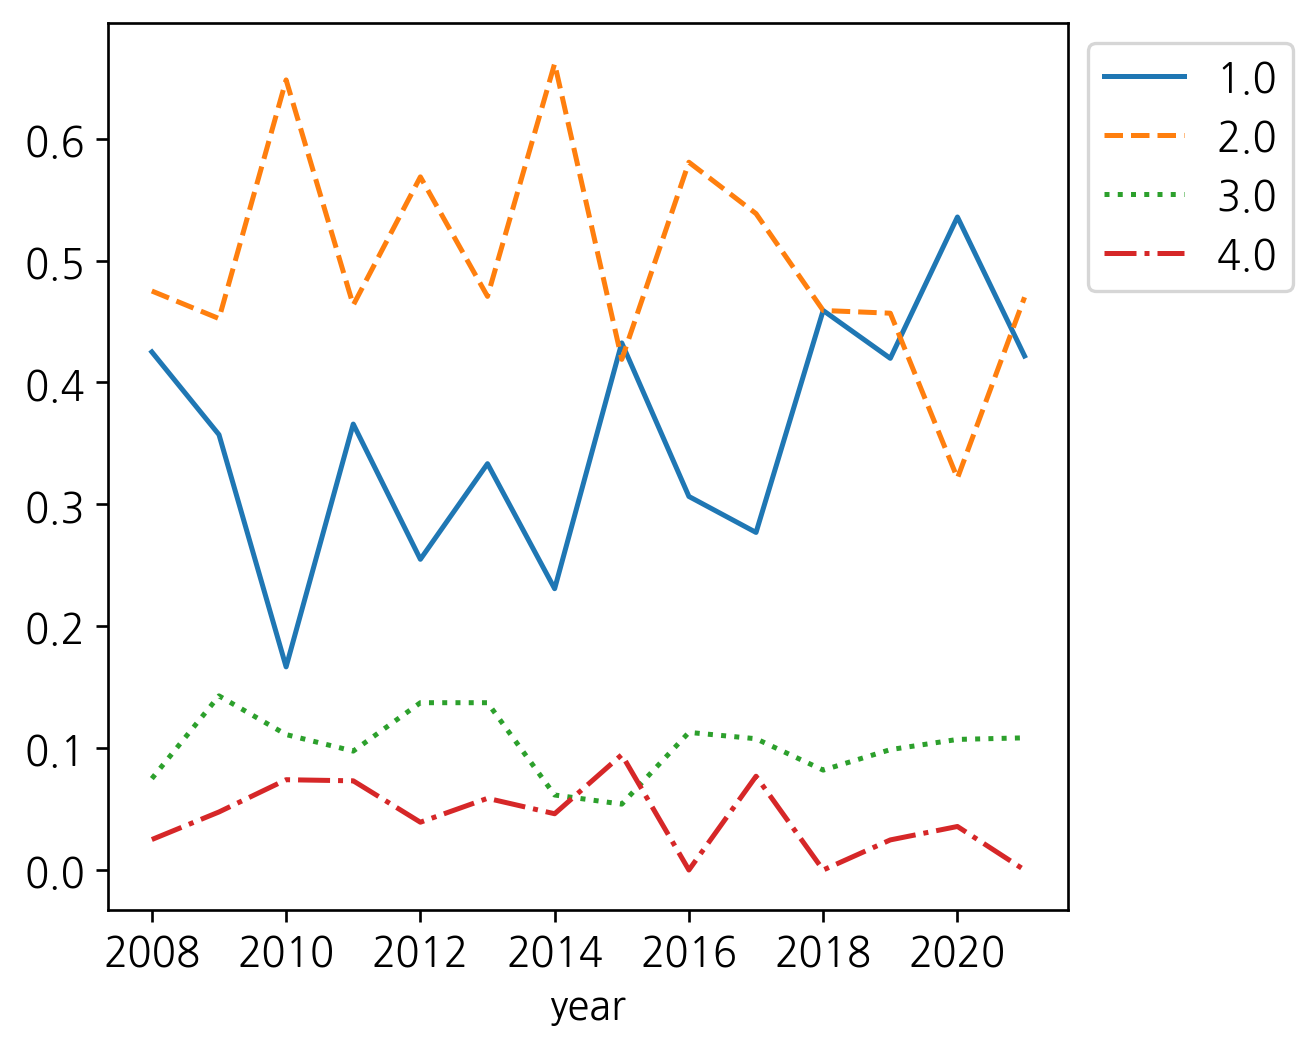

In [26]:
pd.crosstab(ref_fu['classification'],ref_fu['year'],normalize='columns').T.plot(style=['-', '--', ':', '-.'])
# 범례 위치 설정: 플롯의 오른쪽 바깥쪽
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# 축 조정 (범례에 의해 가려지는 부분 방지)
plt.subplots_adjust(right=0.75)

In [27]:
# 연도별 주요 저작 인용 패턴
pd.crosstab(ref_fu['uri'],ref_fu['year'],margins=True).to_excel('./stats/연도별_푸코저작_인용.xlsx')

In [28]:
# 성별 주요 저작 인용 패턴
pd.crosstab(ref_fu['uri'],ref_fu['gender'],margins=True).to_excel('./stats/성별_푸코저작_인용.xlsx')

In [29]:
top10 = pd.read_excel('./FoucaultKoreanLiterature/stats/연도별_푸코저작_인용_Top10.xlsx')
top10

,title,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,감시와 처벌,9,7,12,5,12,6,11,11,11,9,9,14,6,10
1,성의 역사 1 - 앎의 의지,7,8,11,7,9,7,9,5,6,9,6,9,1,13
2,말과 사물,6,3,4,2,3,6,6,5,4,4,8,11,13,10
3,헤테로토피아,0,0,0,0,0,0,2,9,4,8,11,14,14,18
4,안전 영토 인구,0,0,4,0,6,3,8,4,4,6,5,5,4,5
5,광기의 역사,2,1,1,6,4,3,1,6,4,2,3,3,2,1
6,담론의 질서,1,2,2,5,3,3,3,2,6,2,3,2,1,2
7,지식의 고고학,4,2,1,2,3,2,2,6,3,0,3,3,0,1
8,사회를 보호해야 한다,0,0,3,2,0,0,1,5,3,4,4,5,1,4
9,임상의학의 탄생,2,1,1,2,2,3,3,3,3,2,2,1,0,1


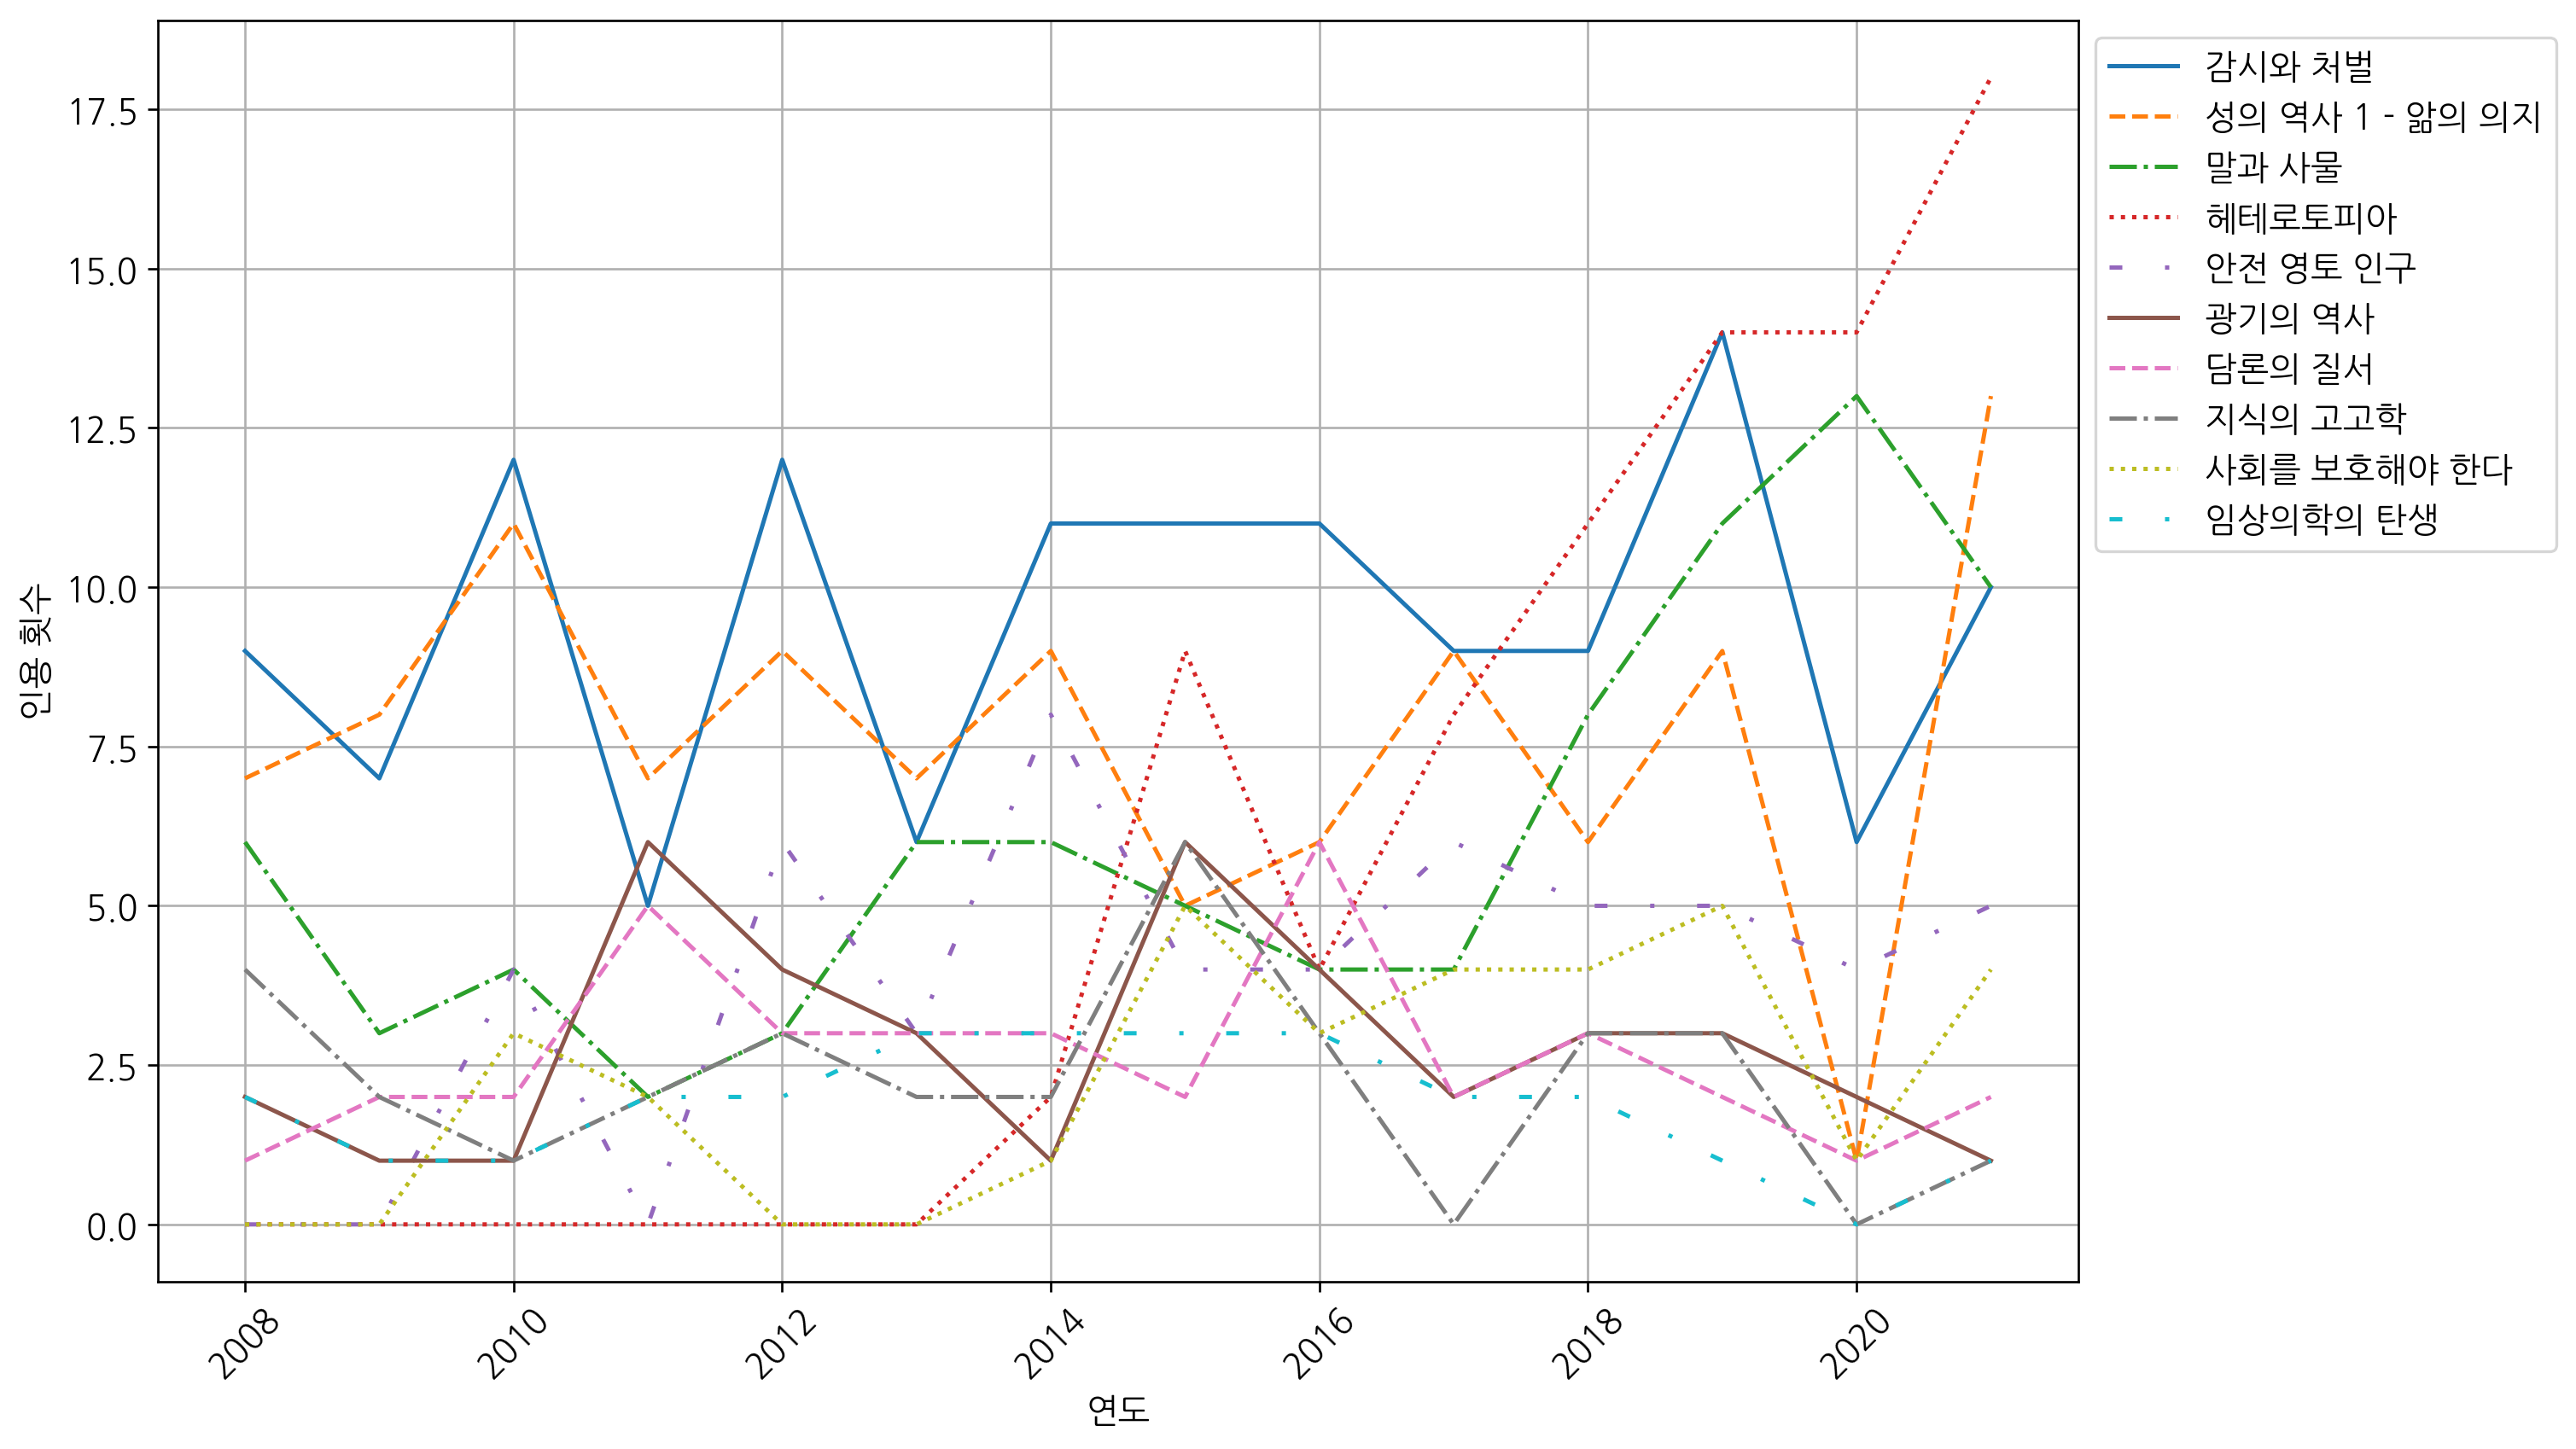

In [30]:
# Simplifying the line styles to ensure compatibility
line_styles = ['-', '--', '-.', ':', (0, (3, 10, 1, 10))]

# Re-plotting
plt.figure(figsize=(15, 8))

for i, title in enumerate(top10['title']):
    plt.plot(top10.columns[1:], top10.iloc[i, 1:], linestyle=line_styles[i % len(line_styles)], label=title)

# plt.title('연도별 미셸 푸코 저작 인용 추이')
plt.xlabel('연도')
plt.ylabel('인용 횟수')
plt.xticks(rotation=45)
plt.legend(title='작품', loc='upper left')
plt.grid(True)

# Improving font properties for better display of Korean characters
# plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 12
# 범례 위치 설정: 플롯의 오른쪽 바깥쪽
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# 축 조정 (범례에 의해 가려지는 부분 방지)
plt.subplots_adjust(right=0.75)
plt.show()

### 2. 누가 인용하는가?

##### 세대

In [31]:
df.loc[~pd.isna(df['birth']),'birth'] = df[~pd.isna(df['birth'])]['birth'].map(lambda x:1900 + int(x))
df['birth']

0        1969.0
1        1971.0
2        1978.0
3        1974.0
4        1990.0
          ...  
11936    1968.0
11937    1979.0
11938    1987.0
11939    1984.0
11940    1976.0
Name: birth, Length: 11941, dtype: float64

In [32]:
# 생년 세대
df.loc[~pd.isna(df['birth']),'birth_gen'] = \
pd.cut(df.loc[~pd.isna(df['birth']),'birth'],bins=[1900,1940,1950,1960,1970,1980,1990,2000],labels=['40년생 이전','40년대생','50년대생','60년대생','70년대생','80년대생','90년생 이후'],right=False)

In [33]:
# 생년 세대 merge
ref_fu = ref_fu.merge(df[['artiId','birth_gen']])

In [34]:
# 세대별 주요 저작 인용 패턴
pd.crosstab(ref_fu['uri'],ref_fu['birth_gen'],margins=True).to_excel('./stats/세대별_푸코저작_인용.xlsx')

In [35]:
df['birth_gen'].value_counts()

70년대생      4488
60년대생      3729
80년대생      1516
50년대생      1045
90년생 이후     141
40년대생       107
40년생 이전      11
Name: birth_gen, dtype: int64

In [36]:
df['birth_gen'].value_counts(normalize=True)

70년대생      0.406632
60년대생      0.337864
80년대생      0.137356
50년대생      0.094682
90년생 이후    0.012775
40년대생      0.009695
40년생 이전    0.000997
Name: birth_gen, dtype: float64

In [37]:
pd.crosstab(df['birth_gen'],df['mf'])

mf,0.0,1.0
birth_gen,,
40년생 이전,11,0
40년대생,102,5
50년대생,1007,38
60년대생,3535,194
70년대생,4228,260
80년대생,1428,88
90년생 이후,134,7


In [38]:
pd.crosstab(df['birth_gen'],df['mf'],normalize='index')

mf,0.0,1.0
birth_gen,,
40년생 이전,1.000000,0.000000
40년대생,0.953271,0.046729
50년대생,0.963636,0.036364
60년대생,0.947975,0.052025
70년대생,0.942068,0.057932
80년대생,0.941953,0.058047
90년생 이후,0.950355,0.049645


In [39]:
# Continggency Table 생성
birth_mf = pd.crosstab(df['birth_gen'],df['mf'])
birth_mf = birth_mf[1:]
birth_mf.columns = ['푸코_비인용','푸코_인용']
with pd.ExcelWriter(f'./stats/푸코_인용_인구사회정보.xlsx',mode='w',engine='openpyxl') as writer:
    (birth_mf).to_excel(writer,sheet_name='세대-푸코 Table')
birth_mf

,푸코_비인용,푸코_인용
birth_gen,,
40년대생,102,5
50년대생,1007,38
60년대생,3535,194
70년대생,4228,260
80년대생,1428,88
90년생 이후,134,7


In [40]:
chi2_contingency(birth_mf)

Chi2ContingencyResult(statistic=8.681617479407551, pvalue=0.12245733787703166, dof=5, expected_freq=array([[ 101.25503356,    5.74496644],
       [ 988.89261745,   56.10738255],
       [3528.7852349 ,  200.2147651 ],
       [4247.03355705,  240.96644295],
       [1434.60402685,   81.39597315],
       [ 133.4295302 ,    7.5704698 ]]))

In [41]:
# 50 ~ 80년대생만
chi2_contingency(birth_mf[1:-1])

Chi2ContingencyResult(statistic=8.512697957036925, pvalue=0.03652303411473961, dof=3, expected_freq=array([[ 988.76507701,   56.23492299],
       [3528.3301169 ,  200.6698831 ],
       [4246.48580442,  241.51419558],
       [1434.41900167,   81.58099833]]))

##### 성별

In [42]:
df['gender'].value_counts()

남    5610
여    5493
Name: gender, dtype: int64

In [43]:
# Continggency Table 생성
gender_mf = pd.crosstab(df['gender'],df['mf'])
gender_mf.columns = ['푸코_비인용','푸코_인용']
with pd.ExcelWriter('./stats/푸코_인용_인구사회정보.xlsx',mode='a',engine='openpyxl') as writer:
    (gender_mf).to_excel(writer,sheet_name='성별-푸코 Table')

In [44]:
gender_mf

,푸코_비인용,푸코_인용
gender,,
남,5341,269
여,5167,326


In [45]:
chi2_contingency(gender_mf)

Chi2ContingencyResult(statistic=6.8866538123679195, pvalue=0.008684168194229994, dof=1, expected_freq=array([[5309.36503648,  300.63496352],
       [5198.63496352,  294.36503648]]))

In [46]:
pd.crosstab(df['gender'],df['mf'],normalize='index')

mf,0.0,1.0
gender,,
남,0.952050,0.047950
여,0.940652,0.059348


##### 김윤식

In [54]:
# 논문 게재 year 컬럼 추가
ref_df = ref_df.merge(df[['artiId','year','gender']])

In [55]:
ref_kim = ref_df.loc[ref_df['author']=='김윤식'].reset_index(drop=True)

In [56]:
pd.crosstab(df['year'],df['gender'])

gender,남,여
year,,
2008,353,285
2009,436,326
2010,459,320
2011,421,341
2012,420,372
2013,443,381
2014,443,410
2015,448,443
2016,387,407


In [57]:
pd.crosstab(df['year'],df['gender'],normalize='index')

gender,남,여
year,,
2008,0.553292,0.446708
2009,0.572178,0.427822
2010,0.589217,0.410783
2011,0.552493,0.447507
2012,0.530303,0.469697
2013,0.537621,0.462379
2014,0.519343,0.480657
2015,0.502806,0.497194
2016,0.487406,0.512594
